In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDRegressor


from scipy.stats import boxcox

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              200 non-null    int64 
 1   Area            200 non-null    int64 
 2   SaleCondition   200 non-null    object
 3   GarageArea      200 non-null    int64 
 4   HeatingQuality  200 non-null    object
 5   SalePrice       200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [4]:
df.count()

Id                200
Area              200
SaleCondition     200
GarageArea        200
HeatingQuality    200
SalePrice         200
dtype: int64

In [5]:
df.isnull().sum()

Id                0
Area              0
SaleCondition     0
GarageArea        0
HeatingQuality    0
SalePrice         0
dtype: int64

In [6]:
df.head()

,Id,Area,SaleCondition,GarageArea,HeatingQuality,SalePrice
0,1,8450,Normal,548,Ex,208500
1,2,9600,Normal,460,Ex,181500
2,3,11250,Normal,608,Ex,223500
3,4,9550,NotNormal,642,Gd,140000
4,5,14260,Normal,836,Ex,250000


#  We will use fields Area and Garage Area and transform it using Function FE.

In [11]:
columns_to_drop = ["SaleCondition", "HeatingQuality", "Id"]
df_new = df.drop(columns_to_drop, axis=1)

In [12]:
df_new.head()

,Area,GarageArea,SalePrice
0,8450,548,208500
1,9600,460,181500
2,11250,608,223500
3,9550,642,140000
4,14260,836,250000


In [77]:
df_new.skew(axis = 0, skipna = True)

Area          3.478234
GarageArea   -0.175002
SalePrice     1.383253
dtype: float64

#### looks like Area has the most amont of Skewness. Lets draw this.

In [79]:
import seaborn as sns

<AxesSubplot:xlabel='Area', ylabel='Count'>

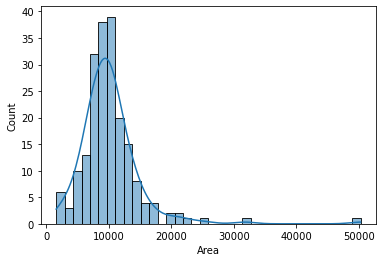

In [80]:
# Plot histogram
sns.histplot(data = df_new, x = "Area", kde = True)

# What is skewness?
Skewness is an asymmetry in the distribution of data as it does not show any kind of symmetry in continuous data. Skewed data can be of 2 types. Right-Skewed data is also called as Positively-Skewed data and, Left-Skewed data is called as Negatively-Skewed data.

________Let us fix this.________

# Log Transform
Log transformation is most likely the first thing you should do to remove skewness from the predictor.
#### Simple way of implementing log analysis with Numpy

In [81]:
area_log = np.log(df_new['Area'])

In [83]:
area_log.skew(axis = 0, skipna = True)

-0.5997896646818068

In [84]:
# Skewness reduced from 3.478234 to -0.5997896646818068

In [87]:
df_new['area_log'] = area_log

In [89]:
df_new.head()

,Area,GarageArea,SalePrice,area_log
0,8450,548,208500,9.041922
1,9600,460,181500,9.169518
2,11250,608,223500,9.328123
3,9550,642,140000,9.164296
4,14260,836,250000,9.565214


<AxesSubplot:xlabel='area_log', ylabel='Count'>

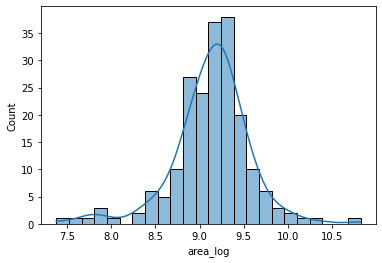

In [88]:
# Plot histogram
sns.histplot(data = df_new, x = "area_log", kde = True)

## Let us test what we have built

#### Step 1: Split train test, calculate logistic transformation, and then find out cross val percentage

In [15]:
x = df[['Area', 'GarageArea']]
y = df['SalePrice']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
x_train.head()

,Area,GarageArea
39,6040,0
78,10778,156
101,9206,476
134,10335,440
140,10500,0


In [41]:
logreg = SGDRegressor(penalty='l2', alpha=0.001)

In [53]:
logreg.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [28]:
# Predict on the test set
y_pred = logreg.predict(x_test)

In [58]:
# # Calculate accuracy on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [56]:
# Perform cross-validation
cv_scores = cross_val_score(logreg, x, y, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [-7.04841447e+24 -1.18160312e+23 -2.55280673e+24 -1.33054438e+24
 -2.34576082e+22]


#### Step 2: Implement Function transformation

In [59]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

In [60]:
x = df[['Area', 'GarageArea']]
y = df['SalePrice']

In [64]:
x = transformer.transform(x)

In [65]:
y = transformer.transform(y)

In [66]:
x.head()

,Area,GarageArea
0,9.042040,6.308098
1,9.169623,6.133398
2,9.328212,6.411818
3,9.164401,6.466145
4,9.565284,6.729824


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [68]:
logreg = SGDRegressor(penalty='l2', alpha=0.001)

In [70]:
logreg.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [74]:
# Predict on the test set
logreg.predict(x_test)

array([12.65765462, 10.36363389, 12.12542086, 11.86972856, 12.36284671,
       14.31238354, 12.31277917, 11.84751827, 12.24955847, 12.17233441,
       12.64253104, 12.77877358, 12.62916495, 11.81968677, 12.03162109,
       12.72050473, 11.32215075, 12.26330802, 12.17265056, 12.71889432,
       11.82554925, 11.59175894, 12.1287007 , 11.83177347, 12.48754217,
       11.78459391, 11.6086197 , 12.03590278, 12.2432819 , 11.91152627,
       12.0302411 ,  9.88731353, 12.86546616, 11.79356315, 12.81619591,
       11.36392937, 12.02649735, 12.36130937, 12.64861738, 12.63154902])

In [75]:
# Perform cross-validation
cv_scores = cross_val_score(logreg, x_test, y_test, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [-1.90018721 -0.09277305 -9.35713455 -0.81353393 -1.0644555 ]


In [76]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

lasso = linear_model.Lasso()
print(cross_val_score(lasso, x, y, cv=3))

[-2.69992392e-05 -1.35981283e-01 -1.03255371e-01]


# Square Root Transform

#### Simple way of implementing Sqrt Transform with Numpy

In [90]:
GarageArea_sqrt = np.sqrt(df_new['GarageArea'])

In [91]:
GarageArea_sqrt.skew()

-1.7362733563966053

In [95]:
# Skewness increased from -0.175002 to -1.7362733563966053
# so this is not the best approach
# but still let us try implementing to learn how to

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

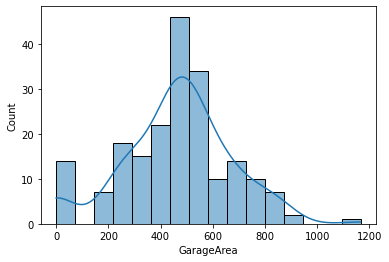

In [96]:
sns.histplot(data = df_new, x = "GarageArea", kde = True)

In [97]:
df_new['GarageArea_sqrt'] = GarageArea_sqrt

<AxesSubplot:xlabel='GarageArea_sqrt', ylabel='Count'>

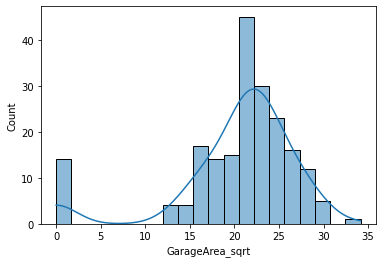

In [98]:
sns.histplot(data = df_new, x = "GarageArea_sqrt", kde = True)

# Box-Cox Transform

In [100]:
import scipy.stats

In [105]:
df_new['Area_BoxCox'], _ =  scipy.stats.boxcox(df_new['Area'])

In [106]:
df_new['Area_BoxCox'].head()

0    27.388654
1    28.269679
2    29.398593
3    28.233153
4    31.158604
Name: Area_BoxCox, dtype: float64

In [108]:
df_new['Area_BoxCox'].skew()

0.09654218179323158

In [109]:
# Skewness reduced from 3.478234 to 0.09654218179323158
# for log transform it was -0.5997896646818068

# Note 
Box-Cox transform assumes positive data values, so it is recommended to ensure that your data meets this requirement before applying the transform.